# Analyzing Analysts
You work for an online job placement agency. There has been a massive spike in demand for data analysts in the past few years. Your manager has asked you to comb through LinkedIn analyst positions and prepare a report that could be helpful to data analysts looking for jobs.

What are the most in-demand seniority levels? What skills get mentioned the most? Are there differences between regions? Use your best judgment to extract the most helpful information for prospective candidates. You have access to three files containing postings scraped from three different locations.

_The original source of the data can be found [here](https://www.kaggle.com/datasets/cedricaubin/linkedin-data-analyst-jobs-listings?select=linkedin-jobs-usa.csv)._

![Seniority levels](seniority.png)   ![Seniority levels by region](seniority-region.png)	
![skills](skills.png)				![skills region](skills-regopm.png)
![remote-onsite distribution](location-region.png)

In [1]:
import json

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd

africa = pd.read_csv("linkedin-jobs-africa.csv")
canada = pd.read_csv("linkedin-jobs-canada.csv")
usa = pd.read_csv("linkedin-jobs-usa.csv")

africa.head(15)

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link
0,Data Analyst,NNC,We are looking for a passionate certified Data...,onsite,NaN,"Cairo, Cairo, Egypt","[{'مستوى الأقدمية': 'غير مطبق'}, {'نوع التوظيف...",2022-11-18,https://eg.linkedin.com/jobs/view/data-analyst...
1,Data Analyst,Watu Credit,"WATU is a focus-driven, customer-centric compa...",onsite,NaN,"Nairobi County, Kenya","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-01,https://ke.linkedin.com/jobs/view/data-analyst...
2,Data Analyst (Credit Risk),Kuda,Kuda is a fintech on a mission to make financi...,onsite,NaN,"Cape Town, Western Cape, South Africa","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-21,https://za.linkedin.com/jobs/view/data-analyst...
3,Data Analyst,Watu Credit,Role: Data AnalystReporting to: Data Analytics...,onsite,NaN,"Nairobi, Nairobi County, Kenya","[{'Seniority level': 'Mid-Senior level'}, {'Em...",2022-11-01,https://ke.linkedin.com/jobs/view/data-analyst...
4,Data Analyst,Tata Consultancy Services,About Tata Consultancy ServicesTata Consultanc...,onsite,NaN,"City of Johannesburg, Gauteng, South Africa","[{'Seniority level': 'Mid-Senior level'}, {'Em...",2022-10-27,https://za.linkedin.com/jobs/view/data-analyst...
5,Data Analyst,Aramex,Job description:Purpose of the Job:Using a var...,onsite,NaN,"Giza, Al Jizah, Egypt","[{'مستوى الأقدمية': 'مستوى متوسط الأقدمية'}, {...",2022-11-10,https://eg.linkedin.com/jobs/view/data-analyst...
6,Data Analyst,Carlos León e hijos,Data Analyst - Investment Management - 65k-70k...,onsite,NaN,"South East, South-East District, Botswana","[{'Seniority level': 'Entry level'}, {'Employm...",2022-11-22,https://bw.linkedin.com/jobs/view/data-analyst...
7,Data Analyst,Winrock International,Position Title: Data Analyst GROUP: Senegal En...,onsite,NaN,"Dakar, Dakar Region, Senegal","[{'Seniority level': 'Entry level'}, {'Employm...",2022-11-23,https://sn.linkedin.com/jobs/view/data-analyst...
8,Data Analyst - Junior,SOS International (SOSi),This position is contingent upon a contract aw...,onsite,NaN,"Nzalae/ Nzawa locations, Kitui County, Kenya","[{'Seniority level': 'Mid-Senior level'}, {'Em...",2022-10-24,https://ke.linkedin.com/jobs/view/data-analyst...
9,Data Analyst,axis,About AxisWe believe that financial services s...,onsite,NaN,"Cairo, Cairo, Egypt","[{'مستوى الأقدمية': 'مستوى المبتدئين'}, {'نوع ...",2022-09-18,https://eg.linkedin.com/jobs/view/data-analyst...


In [5]:
africa['region']='Africa'
canada['region']='Canada'
usa['region']='USA'

In [6]:
new_df=pd.concat([africa,canada,usa])

## Exploratory Data analysis & cleaning

In [7]:
#africa['description'].iat[2]
new_df.head()

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link,region
0,Data Analyst,NNC,We are looking for a passionate certified Data...,onsite,NaN,"Cairo, Cairo, Egypt","[{'مستوى الأقدمية': 'غير مطبق'}, {'نوع التوظيف...",2022-11-18,https://eg.linkedin.com/jobs/view/data-analyst...,Africa
1,Data Analyst,Watu Credit,"WATU is a focus-driven, customer-centric compa...",onsite,NaN,"Nairobi County, Kenya","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-01,https://ke.linkedin.com/jobs/view/data-analyst...,Africa
2,Data Analyst (Credit Risk),Kuda,Kuda is a fintech on a mission to make financi...,onsite,NaN,"Cape Town, Western Cape, South Africa","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-21,https://za.linkedin.com/jobs/view/data-analyst...,Africa
3,Data Analyst,Watu Credit,Role: Data AnalystReporting to: Data Analytics...,onsite,NaN,"Nairobi, Nairobi County, Kenya","[{'Seniority level': 'Mid-Senior level'}, {'Em...",2022-11-01,https://ke.linkedin.com/jobs/view/data-analyst...,Africa
4,Data Analyst,Tata Consultancy Services,About Tata Consultancy ServicesTata Consultanc...,onsite,NaN,"City of Johannesburg, Gauteng, South Africa","[{'Seniority level': 'Mid-Senior level'}, {'Em...",2022-10-27,https://za.linkedin.com/jobs/view/data-analyst...,Africa


In [8]:
new_df.describe()

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link,region
count,8490,8490,8490,8490,965,8490,8490,8490,8490,8490
unique,192,396,480,3,48,189,296,55,8490,3
top,Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,$50.00\r\n -\r\n $60.00,"Toronto, Ontario, Canada","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-22,https://eg.linkedin.com/jobs/view/data-analyst...,Africa
freq,4464,499,309,2897,89,981,489,796,1,2872


In [9]:
new_df.isnull().sum()

title               0
company             0
description         0
onsite_remote       0
salary           7525
location            0
criteria            0
posted_date         0
link                0
region              0
dtype: int64

In [10]:
new_df.shape

(8490, 10)

In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8490 entries, 0 to 2844
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          8490 non-null   object
 1   company        8490 non-null   object
 2   description    8490 non-null   object
 3   onsite_remote  8490 non-null   object
 4   salary         965 non-null    object
 5   location       8490 non-null   object
 6   criteria       8490 non-null   object
 7   posted_date    8490 non-null   object
 8   link           8490 non-null   object
 9   region         8490 non-null   object
dtypes: object(10)
memory usage: 729.6+ KB


In [12]:
africa['criteria'].iat[10]

"[{'Seniority level': 'Entry level'}, {'Employment type': 'Full-time'}, {'Job function': 'Information Technology'}, {'Industries': 'Staffing and Recruiting'}]"

In [13]:
import ast

In [14]:
new_df=new_df.dropna(subset=['criteria'])
new_df.shape

(8490, 10)

In [15]:
def split_sl(crit):
	crit_list=ast.literal_eval(crit)
	result = {}
	for i in crit_list:
		result.update(i)
	sl=result.get('Seniority level')
	return sl

def split_et(crit):
	crit_list=ast.literal_eval(crit)
	result = {}
	for i in crit_list:
		result.update(i)
	sl=result.get('Employment type')
	return sl


africa_sl=africa['criteria']
new_df['seniority']=new_df['criteria'].apply(lambda x: split_sl(x))
new_df['Employment']=new_df['criteria'].apply(lambda x: split_et(x))

In [16]:
new_df['country']=new_df['location'].apply(lambda x:x.split(',')[-1])

In [17]:
new_df.head()

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link,region,seniority,Employment,country
0,Data Analyst,NNC,We are looking for a passionate certified Data...,onsite,NaN,"Cairo, Cairo, Egypt","[{'مستوى الأقدمية': 'غير مطبق'}, {'نوع التوظيف...",2022-11-18,https://eg.linkedin.com/jobs/view/data-analyst...,Africa,None,None,Egypt
1,Data Analyst,Watu Credit,"WATU is a focus-driven, customer-centric compa...",onsite,NaN,"Nairobi County, Kenya","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-01,https://ke.linkedin.com/jobs/view/data-analyst...,Africa,Associate,Full-time,Kenya
2,Data Analyst (Credit Risk),Kuda,Kuda is a fintech on a mission to make financi...,onsite,NaN,"Cape Town, Western Cape, South Africa","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-21,https://za.linkedin.com/jobs/view/data-analyst...,Africa,Not Applicable,Full-time,South Africa
3,Data Analyst,Watu Credit,Role: Data AnalystReporting to: Data Analytics...,onsite,NaN,"Nairobi, Nairobi County, Kenya","[{'Seniority level': 'Mid-Senior level'}, {'Em...",2022-11-01,https://ke.linkedin.com/jobs/view/data-analyst...,Africa,Mid-Senior level,Full-time,Kenya
4,Data Analyst,Tata Consultancy Services,About Tata Consultancy ServicesTata Consultanc...,onsite,NaN,"City of Johannesburg, Gauteng, South Africa","[{'Seniority level': 'Mid-Senior level'}, {'Em...",2022-10-27,https://za.linkedin.com/jobs/view/data-analyst...,Africa,Mid-Senior level,Contract,South Africa


In [18]:
#more eda
new_df.describe()

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link,region,seniority,Employment,country
count,8490,8490,8490,8490,965,8490,8490,8490,8490,8490,7632,8001,8490
unique,192,396,480,3,48,189,296,55,8490,3,6,7,70
top,Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,$50.00\r\n -\r\n $60.00,"Toronto, Ontario, Canada","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-22,https://eg.linkedin.com/jobs/view/data-analyst...,Africa,Entry level,Full-time,Canada
freq,4464,499,309,2897,89,981,489,796,1,2872,2591,6668,2404


In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8490 entries, 0 to 2844
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          8490 non-null   object
 1   company        8490 non-null   object
 2   description    8490 non-null   object
 3   onsite_remote  8490 non-null   object
 4   salary         965 non-null    object
 5   location       8490 non-null   object
 6   criteria       8490 non-null   object
 7   posted_date    8490 non-null   object
 8   link           8490 non-null   object
 9   region         8490 non-null   object
 10  seniority      7632 non-null   object
 11  Employment     8001 non-null   object
 12  country        8490 non-null   object
dtypes: object(13)
memory usage: 928.6+ KB


In [20]:
#change data type of date to datatime
new_df['posted_date']=new_df['posted_date'].astype('datetime64')
#drop link; its useless
new_df.drop(columns=['link'],inplace=True)

In [21]:
# drop salary, too many fields are missing
new_df.drop(columns=['salary'],inplace=True)

In [22]:
# drop egypt since i cant get seniority levels
new_df=new_df[new_df['country']!='Egypt']
print('Egypt' in new_df['country'].unique())
#new_df.country.value_counts()

False


In [23]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8403 entries, 0 to 2844
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   title          8403 non-null   object        
 1   company        8403 non-null   object        
 2   description    8403 non-null   object        
 3   onsite_remote  8403 non-null   object        
 4   location       8403 non-null   object        
 5   criteria       8403 non-null   object        
 6   posted_date    8403 non-null   datetime64[ns]
 7   region         8403 non-null   object        
 8   seniority      7632 non-null   object        
 9   Employment     8001 non-null   object        
 10  country        8403 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 787.8+ KB


In [24]:
new_df['seniority'].value_counts()

Entry level         2591
Mid-Senior level    2376
Associate           1441
Not Applicable      1182
Internship            41
Executive              1
Name: seniority, dtype: int64

In [25]:
# for plotting purposes i will remove all rows with empty values for seniority levels and employment
new_df['seniority'].replace(np.nan, 'Not Applicable', inplace=True)
new_df['Employment'].replace(np.nan, 'Not Applicable', inplace=True)

In [26]:
new_df['Employment'].value_counts()

Full-time         6668
Contract          1178
Not Applicable     402
Temporary           76
Other               39
Part-time           37
Internship           2
Volunteer            1
Name: Employment, dtype: int64

In [27]:
# filter description column for top analyst skills and make columns from them
#new_df['description'].iloc[0]
print('SQL' in new_df['description'].iloc[2])
print('Python' in new_df['description'].iloc[2])
new_df['description'].iloc[2]

True
True


"Kuda is a fintech on a mission to make financial services accessible, affordable and rewarding for every African on the planet.We’re a tribe of passionate and diverse people who dreamed of building an inclusive money app that Africans would love so it’s only right that we ended up with the name ‘Kuda’ which means ‘love’ in Shona, a language spoken in the southern part of Africa.We’re giving Africans around the world a better alternative to traditional finance by delivering free money transfers, smart budgeting and instant access to credit through digital devices.We’ve raised over $90 million from some of the world's most respected institutional investors, and we’re rolling out our game-changing services globally from our offices in Nigeria, South Africa, and the UK.Role Overview:As a Data Analyst - Credit Risk, your main responsibility includes implementing performance metrics for monitoring our credit portfolios (including but not limited to consumer and business overdraft, credit ca

#I am going to add columns for popular analystics skils such as python,sql, tableu,and power bi. if these skills are mentioned, the value will be true otherwise false

In [28]:
new_df.description=new_df.description.apply(str.lower)

In [29]:
new_df['sql']=new_df.description.str.contains('sql',na=False)
new_df['tableau']=new_df.description.str.contains('tableau',na=False)
new_df['python']=new_df.description.str.contains('python',na=False)
new_df['power_bi']=new_df.description.str.contains('power bi',na=False)
new_df[['sql','tableau','python','power_bi']].head()

,sql,tableau,python,power_bi
0,False,False,False,False
1,True,False,True,False
2,True,False,True,False
3,True,False,True,False
4,True,False,True,False


In [30]:
#seems tableau and power bi are not mentioned at all
#lets verify
new_df[new_df['power_bi']].head()

,title,company,description,onsite_remote,location,criteria,posted_date,region,seniority,Employment,country,sql,tableau,python,power_bi
6,Data Analyst,Carlos León e hijos,data analyst - investment management - 65k-70k...,onsite,"South East, South-East District, Botswana","[{'Seniority level': 'Entry level'}, {'Employm...",2022-11-22,Africa,Entry level,Full-time,Botswana,True,True,True,True
7,Data Analyst,Winrock International,position title: data analyst group: senegal en...,onsite,"Dakar, Dakar Region, Senegal","[{'Seniority level': 'Entry level'}, {'Employm...",2022-11-23,Africa,Entry level,Full-time,Senegal,True,False,False,True
10,Data Analyst,Hewitt Colenbrander Recruitment,dur001710 data analyst – pta & jhbpurpose of t...,onsite,"Johannesburg, Gauteng, South Africa","[{'Seniority level': 'Entry level'}, {'Employm...",2022-11-22,Africa,Entry level,Full-time,South Africa,True,True,True,True
13,Data Analyst,DNEXT Intelligence SA,we are looking to hire a data analyst to join ...,onsite,"Sousse, Sousse, Tunisia",[{'نوع التوظيف': 'دوام كامل'}],2022-11-23,Africa,Not Applicable,Not Applicable,Tunisia,True,False,False,True
15,Data Analyst,Ithemba Recruitment,duties and responsibilities:analyze and interp...,onsite,"Rustenburg, North-West, South Africa","[{'Seniority level': 'Entry level'}, {'Employm...",2022-10-19,Africa,Entry level,Contract,South Africa,True,False,True,True


In [31]:
#drop columns not needed anymore
new_df.drop(columns=['description','location','criteria','company','description'],inplace=True)

In [32]:
new_df.isnull().sum()

title            0
onsite_remote    0
posted_date      0
region           0
seniority        0
Employment       0
country          0
sql              0
tableau          0
python           0
power_bi         0
dtype: int64

## Visualization

### Seniority levels in demand

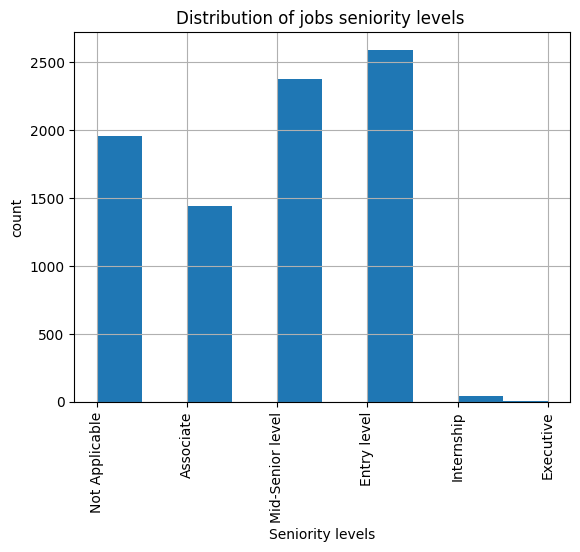

In [33]:
new_df['seniority'].hist()
plt.xticks(rotation=90)
plt.title('Distribution of jobs seniority levels ')
plt.xlabel('Seniority levels')
plt.ylabel('count')
plt.savefig('seniority.png')
plt.show()


so entry level is the most in-demand level followed by mid-senior

### Skills mentioned

In [34]:
#next, in demand skills
skills=['sql','python','tableau','power bi']
skill_count=[new_df[new_df['sql']].shape[0],new_df[new_df['python']].shape[0],new_df[new_df['tableau']].shape[0],new_df[new_df['power_bi']].shape[0]]
skills_df=pd.DataFrame({'skills':skills,'count':skill_count})


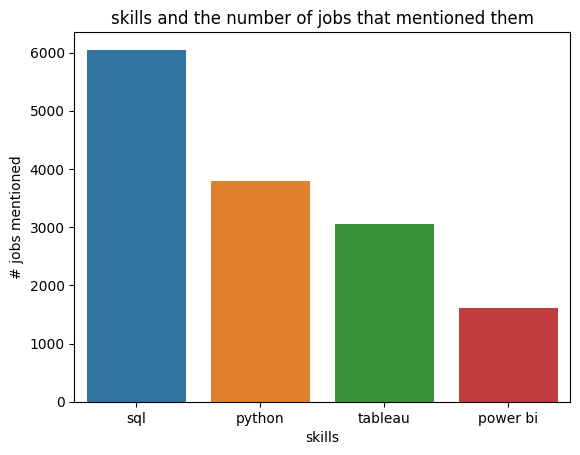

In [35]:
#skills_df.plot(kind='bar')
#plt.show()
skills_df.head()
sns.barplot(data=skills_df,x='skills',y='count')
plt.title('skills and the number of jobs that mentioned them')
plt.ylabel('# jobs mentioned')
plt.savefig('skills.png')
plt.show()

So sql gets mentioned the most!
followed by python, tableau, and lastly power_bi
Now i will make the comparism for regions, years, countries

In [36]:
#skill_count_region=
regions=new_df['region'].unique()

# create new DataFrame 
skills_reg_df=pd.DataFrame(data=None, index=None, columns=['region','sql','python','power_bi','tableau'])

region_grps=new_df.groupby('region')
index=0
for region in regions:
    reg_df=region_grps.get_group(region)
    
    #print(skill_count)
    skills_reg_df.loc[index]=[region,reg_df[reg_df['sql']].shape[0],reg_df[reg_df['python']].shape[0],reg_df[reg_df['tableau']].shape[0],reg_df[reg_df['power_bi']].shape[0]]
    index+=1
skills_reg_df


,region,sql,python,power_bi,tableau
0,Africa,1854,1284,701,612
1,Canada,1981,1314,1283,549
2,USA,2214,1201,1071,447


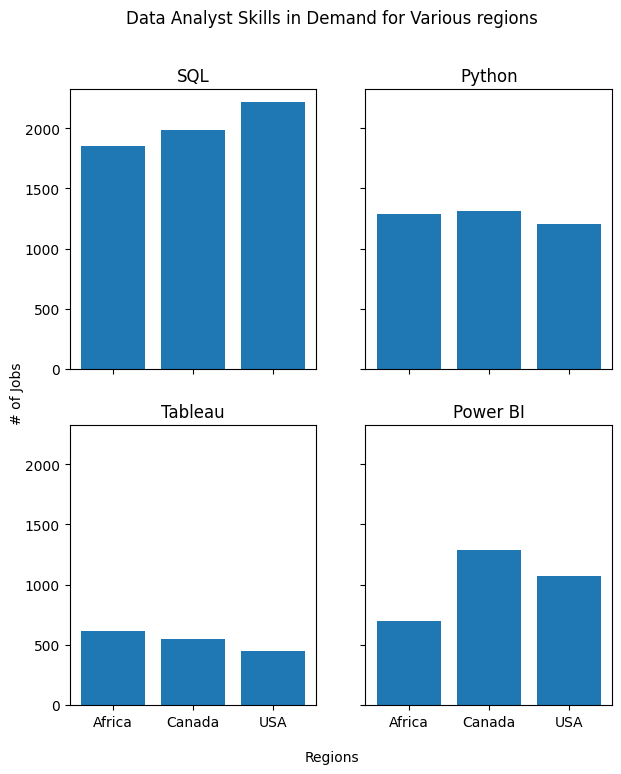

In [37]:
#time for plotting the data above

fig, axs = plt.subplots(2,2,figsize=(7,8),sharex=True, sharey=True) 
fig.suptitle('Data Analyst Skills in Demand for Various regions')
axs[0][0].bar(skills_reg_df['region'], skills_reg_df['sql'])
axs[0][0].set_title('SQL')
axs[0][1].bar(skills_reg_df['region'], skills_reg_df['python'])
axs[0][1].set_title('Python')
axs[1][0].bar(skills_reg_df['region'], skills_reg_df['tableau'])
axs[1][0].set_title('Tableau')
axs[1][1].bar(skills_reg_df['region'], skills_reg_df['power_bi'])
axs[1][1].set_title('Power BI')
fig.text(0.5, 0.04, 'Regions', ha='center')
fig.text(0.04, 0.5, '# of Jobs', va='center', rotation='vertical')
plt.show()
#by making an error, I realised I could stack my plots for better analysis

<Figure size 700x700 with 0 Axes>

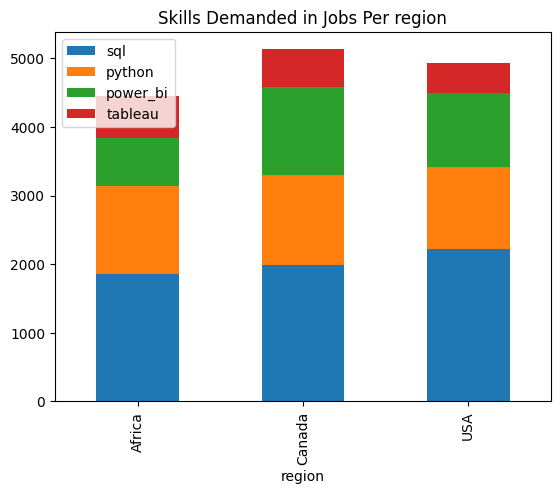

In [38]:
# I want to view the skills as percentages
plt.figure(figsize=(7,7))
skills_reg_df.plot(x='region', kind='bar', stacked=True,title='Skills Demanded in Jobs Per region')
plt.show()

In [39]:
# I will create another database to display the same data in a better way
skills=['sql','python','power_bi','tableau']
skill_reg_df=pd.DataFrame(data=None, index=None, columns=['skill','region','jobs'])
count=0
for skill in skills:
    if(skill in new_df.columns):
        df_skill=new_df[new_df[skill]]
        df_skill_groups=df_skill.groupby('region')
        for region in regions:
            region_skill_count=df_skill_groups.get_group(region).shape[0]
            skill_reg_df.loc[count]=[skill,region,region_skill_count]
            count=count+1
            
            
        
        

In [40]:
skill_reg_df

,skill,region,jobs
0,sql,Africa,1854
1,sql,Canada,1981
2,sql,USA,2214
3,python,Africa,1284
4,python,Canada,1314
5,python,USA,1201
6,power_bi,Africa,612
7,power_bi,Canada,549
8,power_bi,USA,447
9,tableau,Africa,701


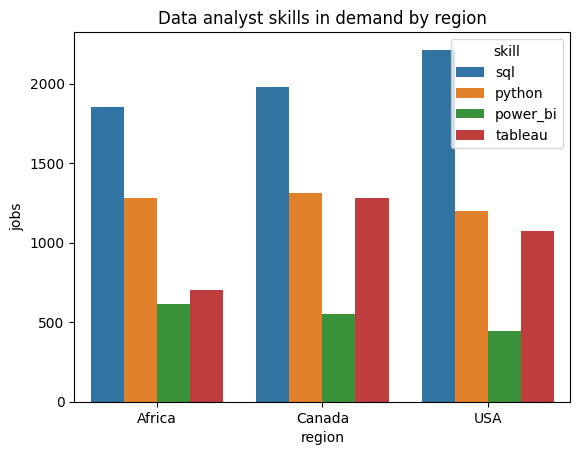

In [41]:
# Now plot on a graph
sns.barplot(data=skill_reg_df,x='region',y='jobs',hue='skill')
plt.title('Data analyst skills in demand by region')
plt.savefig('skills-regopm.png')
plt.show()

There are things to note here
* Sql is mentioned most in both regions
* The power bi is the least demanded in both regions

### Seniority Levels in demand by region

In [42]:
# Lets check the seniority levels for both regions
seniority=new_df['seniority'].unique()
seniority_df=pd.DataFrame(data=None, index=None, columns=['seniority','region','jobs'])
index=0 
for region in regions:
    grp_reg=region_grps.get_group(region)
    seniority_reg={}
    for key,val in grp_reg['seniority'].iteritems():
        
        if val in seniority_reg.keys():
            seniority_reg[val]+=1
        else:
           seniority_reg[val] =1
    for key,val in seniority_reg.items():
        seniority_df.loc[index]=[key,region,val]
        index+=1
   

In [43]:
seniority_df.sort_values(by='jobs')

,seniority,region,jobs
14,Executive,USA,1
9,Internship,Canada,2
4,Internship,Africa,39
7,Associate,Canada,361
1,Associate,Africa,481
11,Entry level,USA,493
0,Not Applicable,Africa,497
6,Not Applicable,Canada,559
12,Associate,USA,599
2,Mid-Senior level,Africa,695


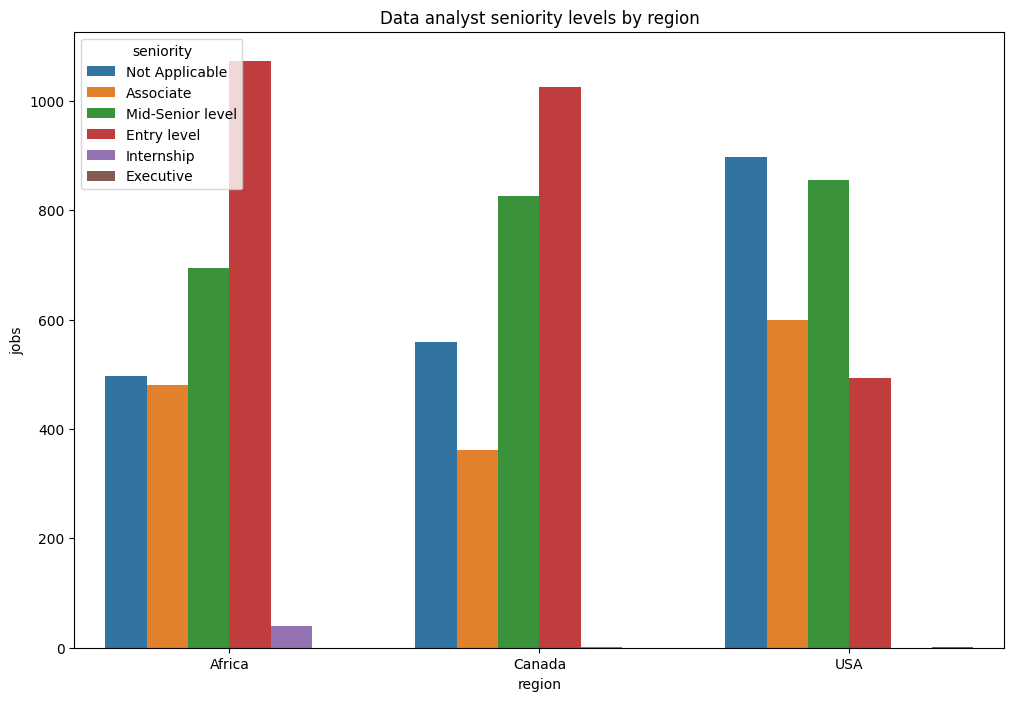

In [44]:
# use seniority_df['jobs'].sum() to check if the dataframe sum of jobs amount to the total number of jobs
#plot seniority levels by region

# Now plot on a graph
plt.figure(figsize=(12,8))
sns.barplot(data=seniority_df,x='region',y='jobs',hue='seniority')
plt.title('Data analyst seniority levels by region')
plt.savefig('seniority-region.png')
plt.show()

we can see that in Africa;
* Most jobs posts demand Entry level
* no job demands Executive


0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
2840    2022
2841    2022
2842    2022
2843    2022
2844    2022
Name: posted_date, Length: 8403, dtype: int64


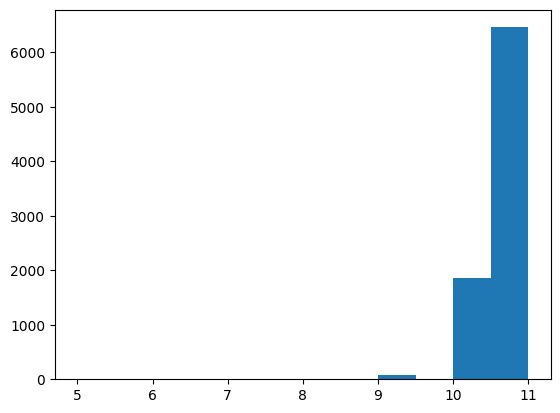

In [45]:
#Next, we see the jobs listed over the years first for all jobs then secondly by region
#new_df['posted_date'].year.hist()
print(new_df.posted_date.dt.year)
plt.hist(new_df.posted_date.dt.month,bins=12)
plt.show()

It seems the only year for the job posting is 2022 and the only months are October and November. so we can't realy perform any aditional analysis with respect to date

In [46]:
# let us see how the jobs are distributed between remote, and onsite for the various region
locations=new_df['onsite_remote'].unique()
location_df=pd.DataFrame(data=None, index=None, columns=['location','region','jobs'])
index=0 
for region in regions:
    grp_reg=region_grps.get_group(region)
    location_reg={}
    for key,val in grp_reg['onsite_remote'].iteritems():
        
        if val in location_reg.keys():
            location_reg[val]+=1
        else:
           location_reg[val] =1
    for key,val in location_reg.items():
        location_df.loc[index]=[key,region,val]
        index+=1


In [47]:
location_df['jobs'].sum()

8403

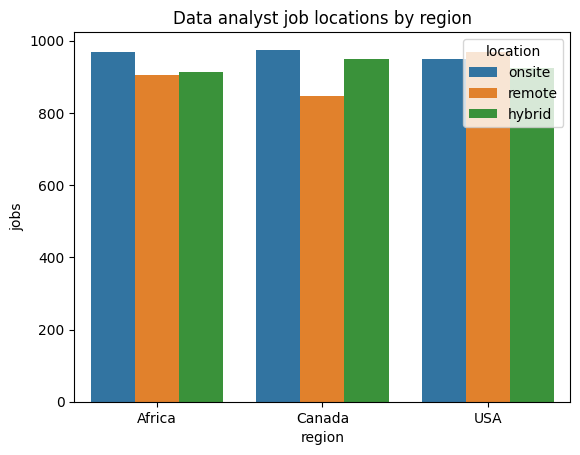

In [48]:
# visualize the data

sns.barplot(data=location_df,x='region',y='jobs',hue='location')
plt.title('Data analyst job locations by region')
plt.savefig('location-region.png')
plt.show()